# Sentiment Analysis of IMDB Movie Reviews

This project performs **binary sentiment classification** (positive vs negative)
on IMDB movie reviews using classical Natural Language Processing (NLP) techniques
and Machine Learning.

**Key steps:**
- Importing required libraries 
- Loading dataset
- Creating a pandas dataframe
- Text preprocessing
- Feature extraction using TF-IDF
- Split data into train and test sets
- Model training
- Performance evaluation

## 1. Importing Required Libraries

In [12]:
# ====================
#    Data handling
# ====================
import pandas as pd
import numpy as np

# ====================
#    Visualization
# ====================
# Plotting library for charts and graphs
import matplotlib.pyplot as plt 
# Statistical data visualization built on matplotlib
import seaborn as sns                    

# ====================
# NLP & preprocessing
# ====================
# Core NLP library
import nltk   
# Common words to remove (e.g., "the", "is")
from nltk.corpus import stopwords  
# Splits text into individual words (tokens)
from nltk.tokenize import word_tokenize  

# ====================
#   Machine Learning
# ====================
from sklearn.model_selection import train_test_split
# Converts text into numerical feature vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


In [13]:
# To ensure NLP tools work correctly
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to /Users/mahsa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/mahsa/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mahsa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/mahsa/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

## 2. Loading IMDB Dataset from NLTK

In [14]:
# ===============================
# Load IMDB movie reviews dataset
# ===============================
# Note: The dataset is tokenized by nltk
from nltk.corpus import movie_reviews

## 3. Create a Pandas Dataframe

In [15]:
import random
# Create a list of (review_text, sentiment_label)
# 'pos' = positive review, 'neg' = negative review
documents = []
# Loop through each sentiment category ('pos', 'neg'), then through each review file
# belonging to that category. Each review is provided as a list of tokenized words,
# which are joined into a single string to reconstruct the full review text.
# The resulting text is paired with its corresponding sentiment label.
for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        review_text = ' '.join(movie_reviews.words(fileid))
        documents.append((review_text, category))

# Shuffle the dataset to avoid any ordering bias
random.shuffle(documents)

# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(documents, columns=['review', 'label'])

# Preview the dataset
df.head()

,review,label
0,by phil curtolo mel gibson ( braveheart ) gave...,pos
1,woof ! too bad that leap of faith was the titl...,neg
2,the happy bastard ' s 30 - second review notti...,pos
3,"no , it is not a bad film , in fact it is so g...",pos
4,after sixteen years francis ford copolla has a...,pos


### Dataset Sanity Check

In [16]:
# Check dataset size and class distribution
print("Dataset shape:", df.shape)
print(df['label'].value_counts())

Dataset shape: (2000, 2)
label
pos    1000
neg    1000
Name: count, dtype: int64


## 4. Text Preprocessing <br>
We need to:
1. Convert all text to lowercase
2. Tokenize the text → break into words
3. Remove stopwords → common words like “the”, “is”, “and”
4. Remove non-alphabetic tokens → punctuation, numbers
5. Join tokens back into a cleaned string

In [17]:
# ===============================
# Text Preprocessing Function
# ===============================

# Get list of English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Cleans raw text by:
    1. Lowercasing
    2. Tokenizing into words
    3. Removing stopwords
    4. Removing non-alphabetic tokens
    5. Returning a cleaned string
    """
    # Tokenize and lowercase
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and non-alphabetic tokens
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    
    # Reconstruct cleaned text
    return ' '.join(tokens)


### Apply Preprocessing 

In [18]:
# Apply preprocessing to all reviews
# Create a new column in the dataframe and add the processed data
df['cleaned_review'] = df['review'].apply(preprocess_text)

# Preview the first 5 original vs cleaned reviews
df[['review', 'cleaned_review']].head()


,review,cleaned_review
0,by phil curtolo mel gibson ( braveheart ) gave...,phil curtolo mel gibson braveheart gave grippi...
1,woof ! too bad that leap of faith was the titl...,woof bad leap faith title comedy starring stev...
2,the happy bastard ' s 30 - second review notti...,happy bastard second review notting hill cute ...
3,"no , it is not a bad film , in fact it is so g...",bad film fact good achieving purpose actually ...
4,after sixteen years francis ford copolla has a...,sixteen years francis ford copolla returned fa...


In [19]:
# Check dataset size and class distribution again
print("Dataset shape:", df.shape)
print(df['label'].value_counts())


Dataset shape: (2000, 3)
label
pos    1000
neg    1000
Name: count, dtype: int64


## 5. TF-IDF Vectorization

**Goal:**

Convert the cleaned_review text into numerical features that a machine learning model can understand.


**Common techniques:**
1. **Bag of Words (BoW):** Counts how many times each word appears in a document. Simple, but treats all words equally and ignores word importance.  
2. **TF-IDF (Term Frequency – Inverse Document Frequency):** Also counts words, but **weights them by importance**. Words that appear frequently in a document but rarely across all documents get higher weights.  

In this project, TF-IDF is used for feature extraction because it: 
- Reduces the influence of common, uninformative words (like "movie", "film").  
- Helps the model focus on words that are more indicative of sentiment.  
- Generally gives better performance for text classification tasks like sentiment analysis.


In [22]:
# ===============================
# Feature Extraction using TF-IDF
# ===============================

from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=2000)  # Limits to top 2000 words


### Fit and Transform

In [26]:
# Fit TF-IDF to the cleaned reviews and transform text into numerical vectors
X = tfidf_vectorizer.fit_transform(df['cleaned_review'])
# Target labels
y = df['label']

In [28]:
# Check the data 
print('Feature matrix shape (num_reviews, num_features):', X.shape)
print('\n')
print('Label distribution:\n' , y.value_counts())

Feature matrix shape (num_reviews, num_features): (2000, 2000)


Label distribution:
 label
pos    1000
neg    1000
Name: count, dtype: int64


## 6. Split Data into Training and Test Sets

In [54]:
from sklearn.model_selection import train_test_split
# Split data into train and test sets (80% training an 20% test)
# random_state=42 ensures reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the training and test sets 
print("Training set shape (num_reviews, num_features):", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing set shape (num_reviews, num_features):", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training set shape (num_reviews, num_features): (1600, 2000)
Training labels shape: (1600,)
Testing set shape (num_reviews, num_features): (400, 2000)
Testing labels shape: (400,)


## 7. Model Training and Performance Evaluation

### 7.1. Logistic Regression 

**Training**

In [55]:
# Import the model
from sklearn.linear_model import LogisticRegression

# Initialize the model
logistic_regression_classifier = LogisticRegression(random_state=0, max_iter=1000)

# Train the model using the training set
logistic_regression_classifier.fit(X_train, y_train)

# Check training accuracy
print(f"Training accuracy: {logistic_regression_classifier.score(X_train, y_train):.4f}")

Training accuracy: 0.9437


**Performance Evaluation**

In [56]:
# Import required metrics
from sklearn.metrics import accuracy_score, classification_report

y_pred = logistic_regression_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print("------------------------------- " )
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.8400
------------------------------- 
Classification Report:
               precision    recall  f1-score   support

         neg       0.84      0.84      0.84       205
         pos       0.84      0.84      0.84       195

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



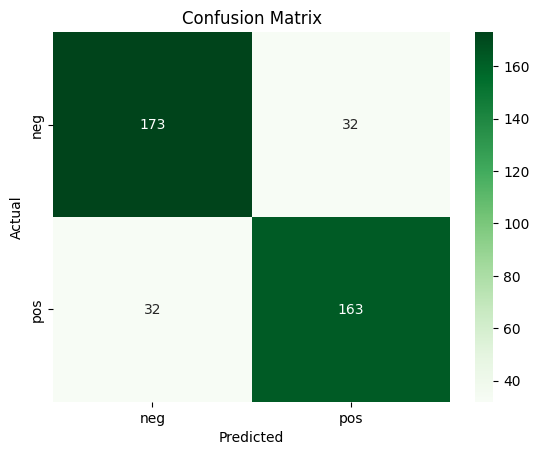

In [57]:
from sklearn.metrics import confusion_matrix

logistic_regression_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(logistic_regression_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['neg','pos'], yticklabels=['neg','pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()